<a href="https://colab.research.google.com/github/tae-min-lee/t-m-po/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B3%B5%EB%B6%80_11_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## imbd 데이터넷 분류 모델 만들기

### 데이터 불러오가

In [1]:
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels)= imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


불러온 데이터를 모델에 맞게 원-핫 인코딩으로 튜닝하기

In [4]:
import numpy as np
def vectorize (sequences,dimension=10000):
  result = np.zeros((len(sequences),dimension))

  for i, sequences in enumerate(sequences):
    result[i,sequences]=1
  return result

x_train = vectorize(train_data)
x_test = vectorize(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 모델 설계

In [5]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

### 컴파일러 설정하기

In [6]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

### vaildation set 나누기

In [10]:
x_val = x_train[:10000]
partical_x =x_train[10000:]
y_val = y_train[:10000]
partical_y = y_train[10000:]

#### 모델 훈련시키기

In [9]:
history = model.fit( partical_x,partical_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5129 - accuracy: 0.7690 - val_loss: 0.4092 - val_accuracy: 0.8344
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2969 - accuracy: 0.9059 - val_loss: 0.3037 - val_accuracy: 0.8845
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2143 - accuracy: 0.9313 - val_loss: 0.2746 - val_accuracy: 0.8928
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1700 - accuracy: 0.9457 - val_loss: 0.2925 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1407 - accuracy: 0.9556 - val_loss: 0.2860 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1156 - accuracy: 0.9637 - val_loss: 0.2953 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0940 - accuracy: 0.9725 - val_loss: 0.3199 - val_accuracy: 0.8807
Epoch 8/20
30

### 그래프로 그리기

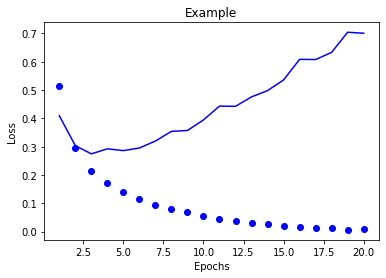

In [15]:
import matplotlib.pyplot as plt

history_dict=history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Example')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.show()

In [16]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7761 - accuracy: 0.8502


[0.776146411895752, 0.8502399921417236]

In [17]:
model.predict(x_test)

array([[5.3701941e-03],
       [9.9999976e-01],
       [9.9702185e-01],
       ...,
       [9.1342488e-04],
       [1.3602019e-02],
       [8.6459422e-01]], dtype=float32)

## 보스턴 주택 가격 맞추기 (회귀 문제)


### 데이터 로드

In [1]:
from keras.datasets import boston_housing

(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

### 데이터의 값들이 전부 제각각이므로 모든 값들을 평균이 0이고 표준편차를 1로 만들어줌

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data/=std


test_data -= mean
test_data/=std

### 모델 만들기

In [6]:
from keras import models
from keras import layers

def bild_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape=(train_data[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer='rmsprop',loss='mse',metrics=['accracy'])

  return model

## 합성곱 신경망으로 mnist데이터 훈련시키기

In [1]:
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255
test_images =test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

In [6]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [9]:
from keras import models,layers

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images,train_labels,epochs=20,
          batch_size=128)

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2282 - accuracy: 0.9297
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0560 - accuracy: 0.9826
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0368 - accuracy: 0.9883
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0277 - accuracy: 0.9910
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0219 - accuracy: 0.9933
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0171 - accuracy: 0.9945
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0143 - accuracy: 0.9955
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0112 - accuracy: 0.9966
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0093 - accuracy: 0.9971
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0080 - accuracy: 0.9976